### How to create data for using the MCRGNet?
1. load image and preprocessing
2. Augmentation to enlarge sample scale
3. Save the images and their corresponding labels (optional)

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load LRG table

In [4]:
tablepath = "../catalog/mrt-table3-download.csv"
lrgTable = pd.read_csv(tablepath, sep=" ")

In [5]:
lrgName = np.array(lrgTable["Name"])
lrgType = np.array(lrgTable["Type-Lit"])

### Load image, preprocessing and augmentation

In [6]:
# To install the mcrgnet package, please use
# pip install -e .
import mcrgnet.utils as utils

In [7]:
# Configurations
crop_box = (80,80)
resize_box = (100,100)
clipflag = True
clipparam = [3, 20]
augtimes = 10

#### Take one LRG sample as example

In [8]:
imgname = lrgName[1]
# load image
imgpath = os.path.join("../utils/lrg/", imgname+".fits")
img = utils.read_image(imgpath,ftype="fits")

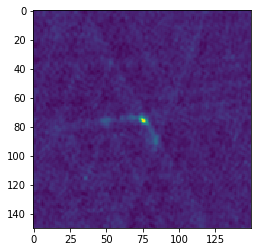

In [9]:
plt.imshow(img)

### Preprocessing and augmentation

In [11]:
imgAug = utils.get_augmentation(
    img=imgpath,
    crop_box=crop_box,
    rez_box=resize_box,
    num_aug=augtimes,
    clipflag=clipflag,
    clipparam=clipparam
)
lblAug = np.ones(augtimes,) * int(lrgType[1])

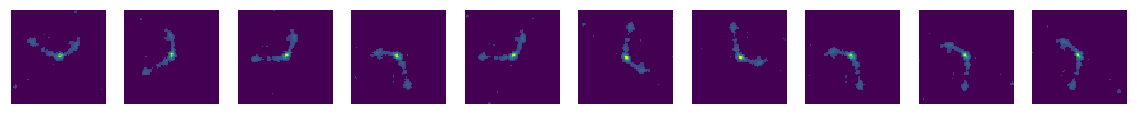

In [12]:
plt.rcParams["figure.figsize"] = (20,2)
for i in range(augtimes):
    ax = plt.subplot(1,augtimes,i+1)
    plt.imshow(imgAug[i,:,:])
    plt.xticks([])
    plt.yticks([])
    plt.box("off")

### Save to pickle

In [13]:
import pickle
with open("./lrg-aug-image.pkl", 'wb') as fp:
    sampleDict = {"name": imgname, 
                  "data":imgAug.reshape(augtimes,resize_box[0]*resize_box[1]),
                  "label": lblAug}
    pickle.dump(sampleDict,fp)

### Load from pickle

In [14]:
with open("./lrg-aug-image.pkl", 'rb') as fp:
    sampleDict = pickle.load(fp)